<a href="https://colab.research.google.com/github/byannurcahyo/2241720134-PCVK-2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas Praktikum

In [1]:
#1. Connect Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#2. Import Library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

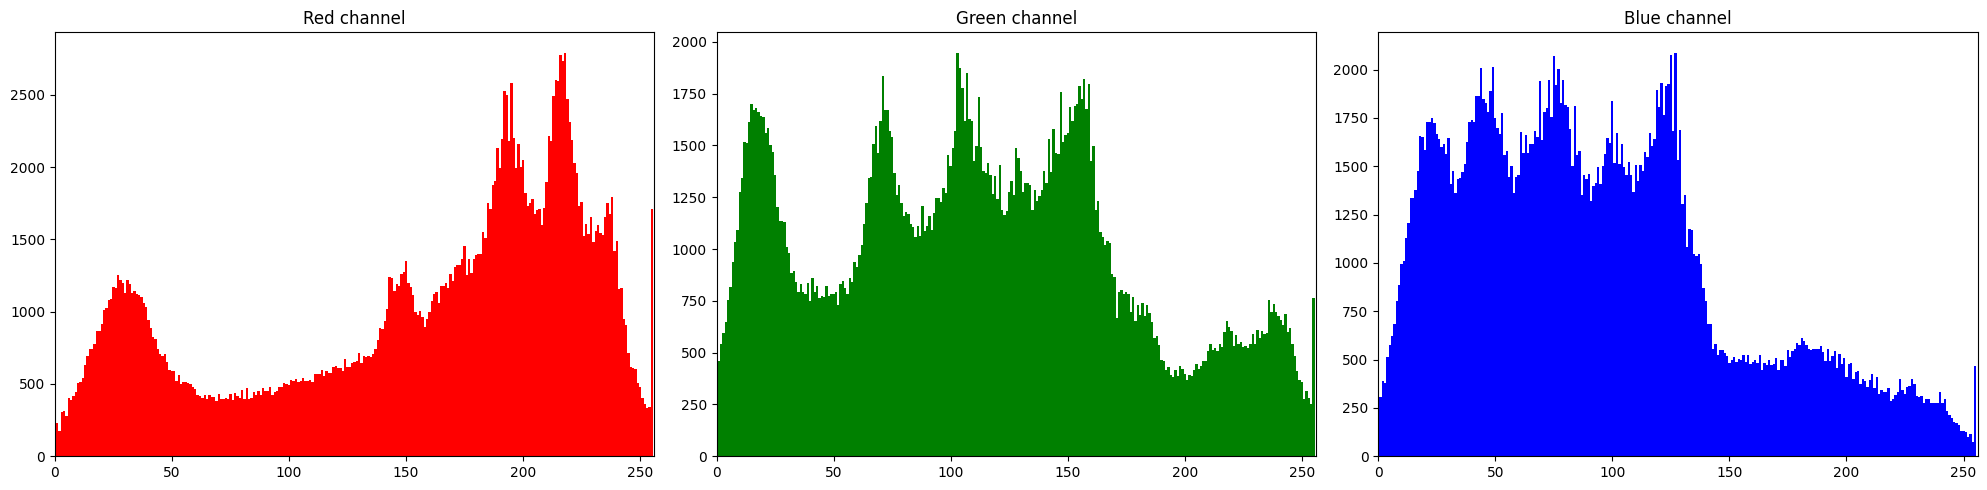

In [26]:
#3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart

img_lena = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def show_image_histogram(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    r_channel, g_channel, b_channel = cv.split(img_rgb)

    r_hist = cv.calcHist([r_channel], [0], None, [256], [0, 256])
    g_hist = cv.calcHist([g_channel], [0], None, [256], [0, 256])
    b_hist = cv.calcHist([b_channel], [0], None, [256], [0, 256])

    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    plt.bar(range(256), r_hist[:, 0], color='r', width=1)
    plt.title('Red channel')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 2)
    plt.bar(range(256), g_hist[:, 0], color='g', width=1)
    plt.title('Green channel')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.bar(range(256), b_hist[:, 0], color='b', width=1)
    plt.title('Blue channel')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

show_image_histogram(img_lena)

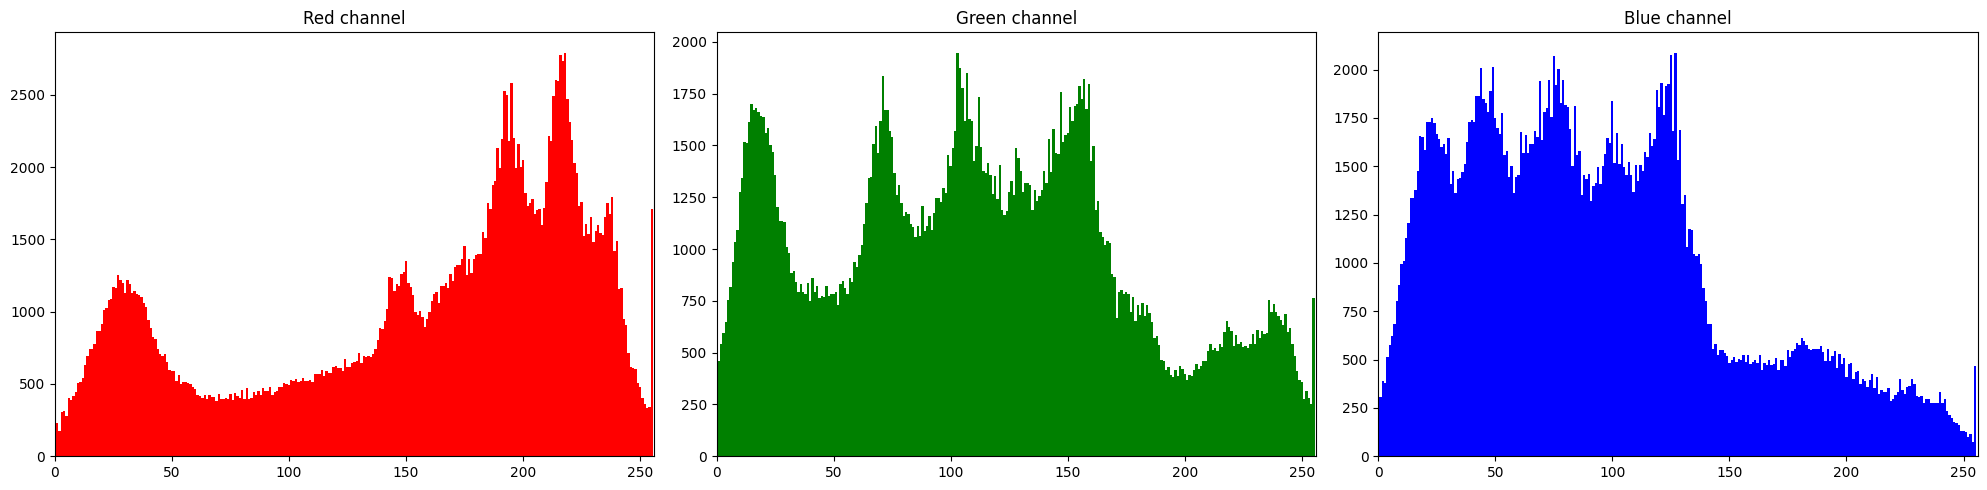

In [23]:
#4. Buatlah histogram citra yang sama tetapi menggunakan NumPy

img_lena = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def show_image_histogram_with_numpy(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    r_channel, g_channel, b_channel = cv.split(img_rgb)

    r_hist_np, r_bins = np.histogram(r_channel.flatten(), bins=256, range=[0, 256])
    g_hist_np, g_bins = np.histogram(g_channel.flatten(), bins=256, range=[0, 256])
    b_hist_np, b_bins = np.histogram(b_channel.flatten(), bins=256, range=[0, 256])

    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    plt.bar(r_bins[:-1], r_hist_np, color='r', width=1)
    plt.title('Red channel')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 2)
    plt.bar(g_bins[:-1], g_hist_np, color='g', width=1)
    plt.title('Green channel')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.bar(b_bins[:-1], b_hist_np, color='b', width=1)
    plt.title('Blue channel')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

show_image_histogram_with_numpy(img_lena)

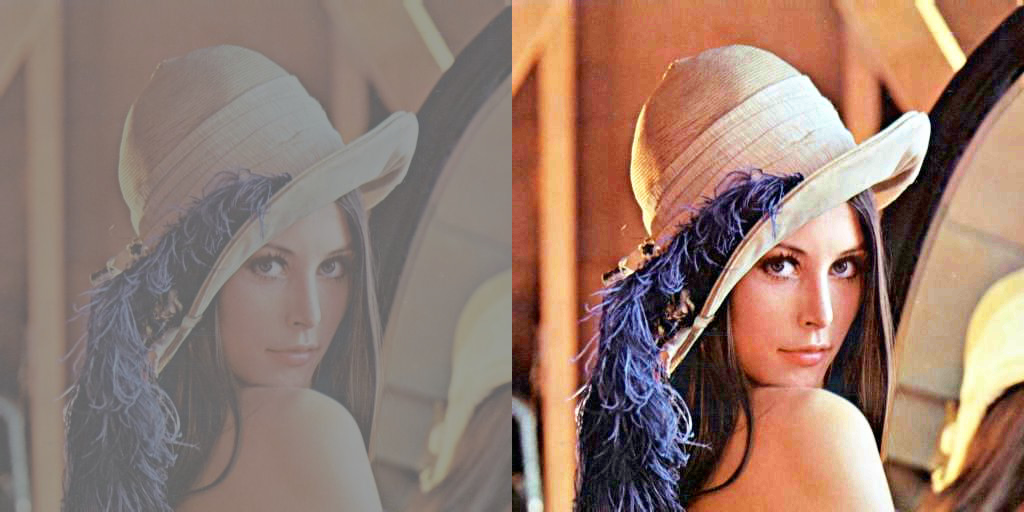

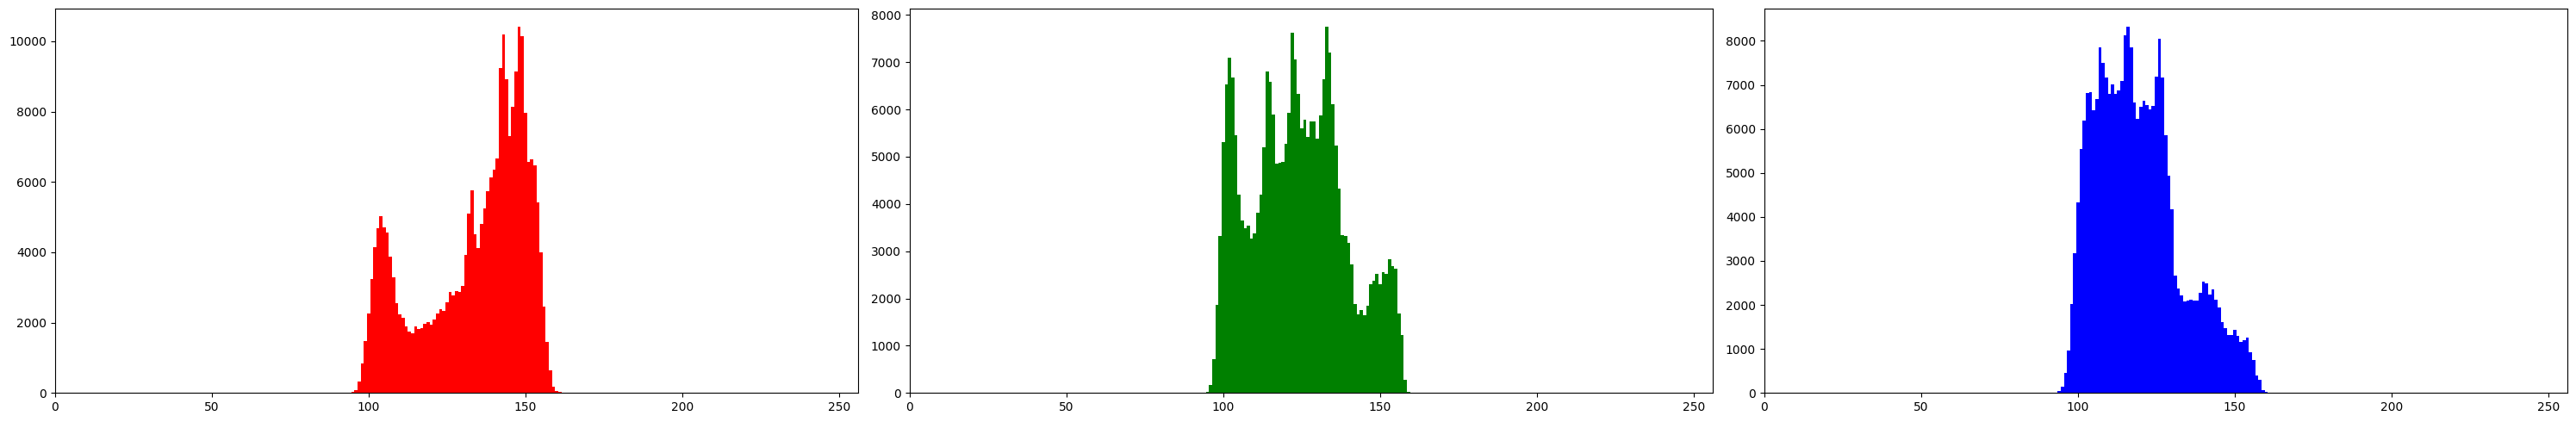

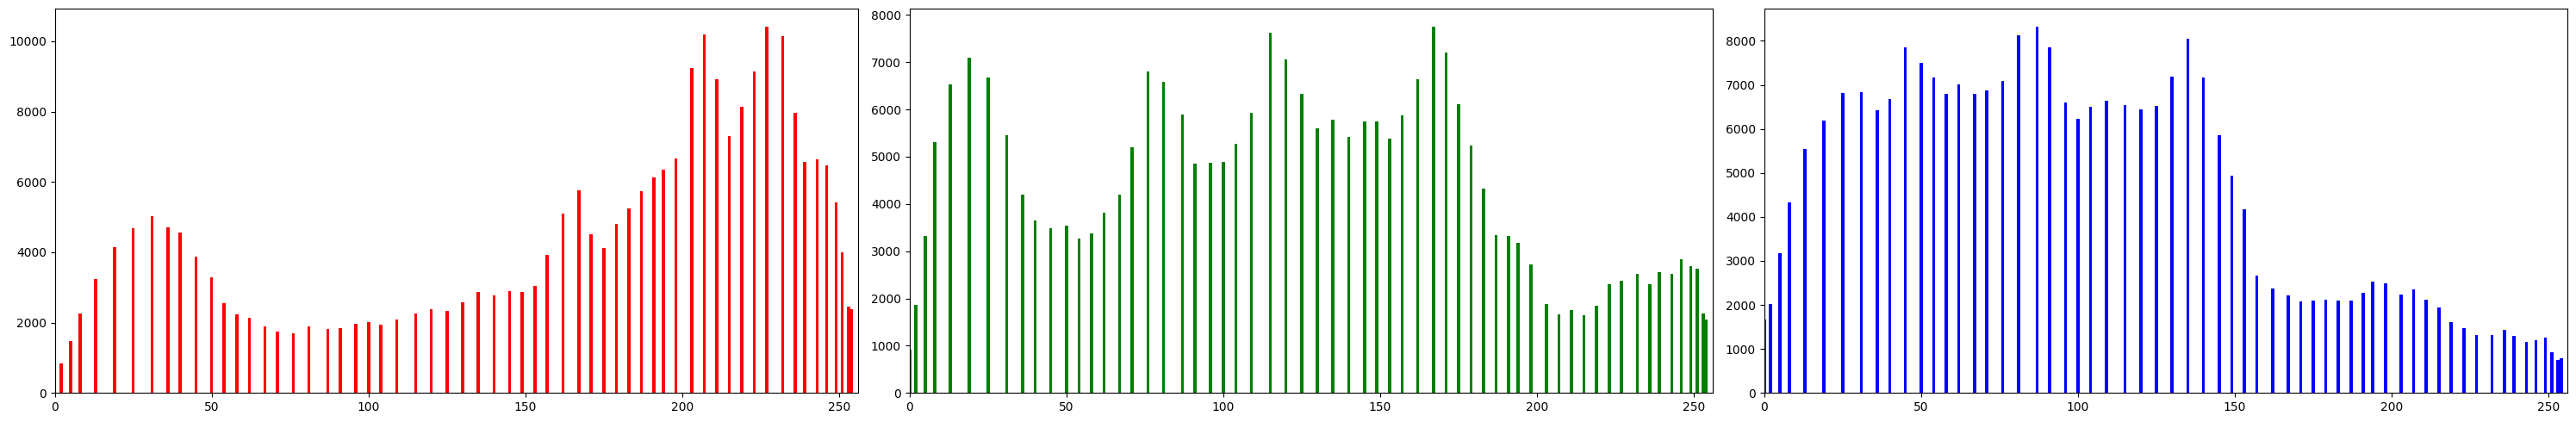

In [30]:
#5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization
img_lena_lc = cv.imread ('/content/drive/MyDrive/PCVK/lena_lc.jpg')

def get_histogram(channel):
    histogram = np.zeros(256)
    for pixel in channel:
        histogram[pixel] += 1
    return histogram

def show_image_histogram(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    r_channel, g_channel, b_channel = cv.split(img_rgb)

    r_hist = cv.calcHist([r_channel], [0], None, [256], [0, 256])
    g_hist = cv.calcHist([g_channel], [0], None, [256], [0, 256])
    b_hist = cv.calcHist([b_channel], [0], None, [256], [0, 256])

    plt.figure(figsize=(30, 5))

    plt.subplot(1, 3, 1)
    plt.bar(range(256), r_hist[:, 0], color='r', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 2)
    plt.bar(range(256), g_hist[:, 0], color='g', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.bar(range(256), b_hist[:, 0], color='b', width=1)
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

b_channel, g_channel, r_channel = cv.split(img_lena_lc)
r_hist = get_histogram(r_channel.flatten())
g_hist = get_histogram(g_channel.flatten())
b_hist = get_histogram(b_channel.flatten())

histogram_array = np.bincount(img_lena_lc.flatten(), minlength=256)

num_px = np.sum(histogram_array)
normalized_histogram = histogram_array / num_px

cdf = np.cumsum(normalized_histogram)

transform_map = np.floor(255 * cdf).astype(np.uint8)

img_list = list(img_lena_lc.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_lena_lc.shape)

final_frame = cv.hconcat((img_lena_lc, eq_img_array))
cv2_imshow(final_frame)
show_image_histogram(img_lena_lc)
show_image_histogram(eq_img_array)

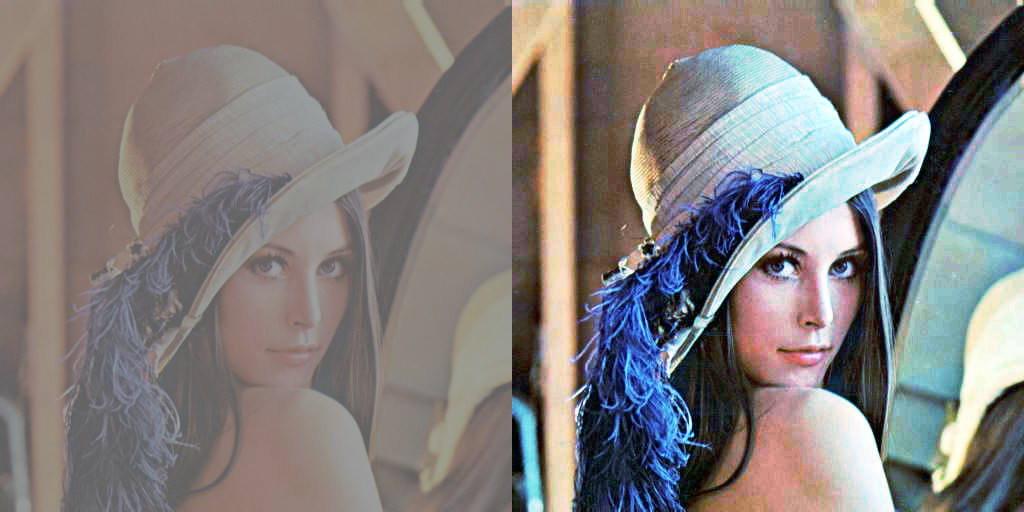

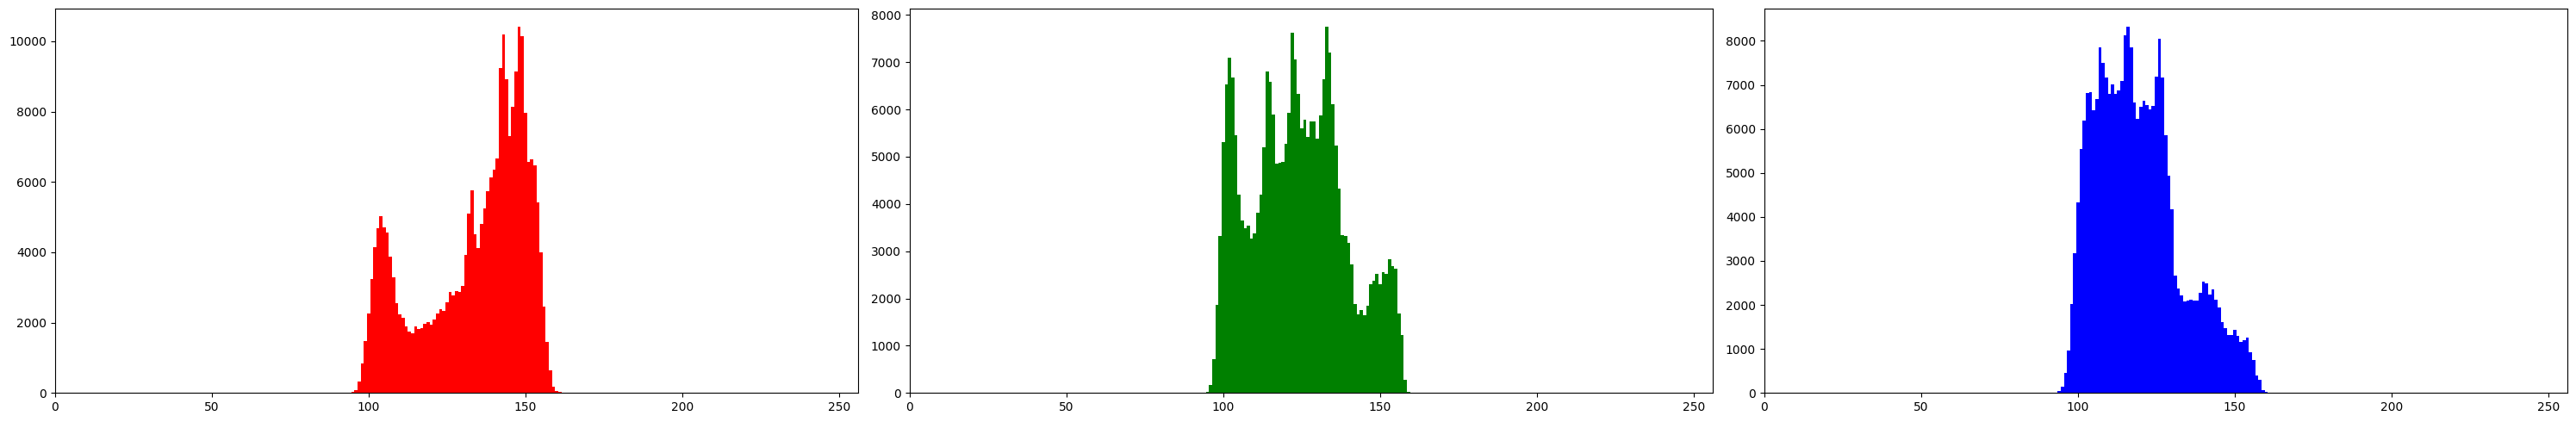

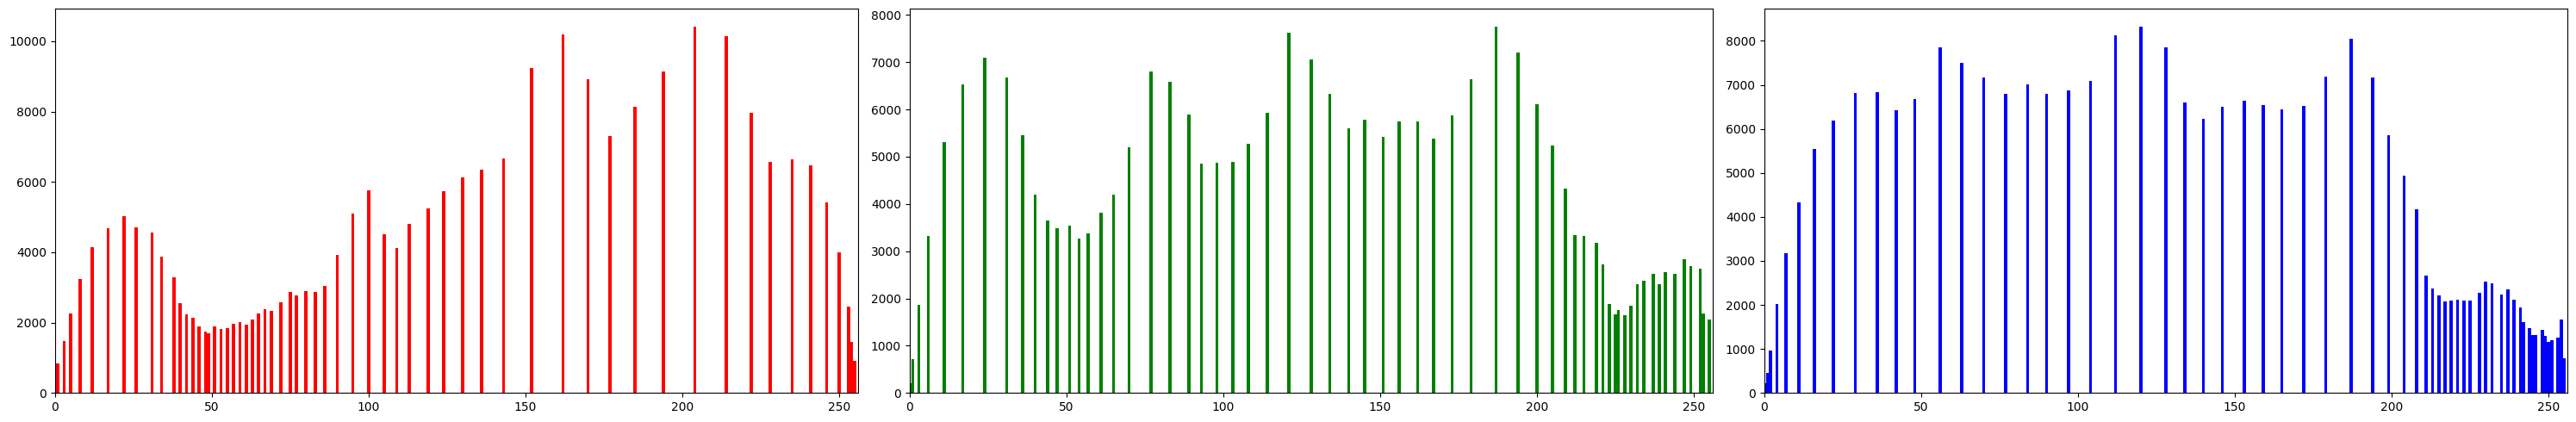

In [33]:
#6. Buatlah histogram citra yang sama tetapi menggunakan CV2
img_lena_lc = cv.imread ('/content/drive/MyDrive/PCVK/lena_lc.jpg')

def histogram_equalization(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    r_channel, g_channel, b_channel = cv.split(img_rgb)

    r_eq = cv.equalizeHist(r_channel)
    g_eq = cv.equalizeHist(g_channel)
    b_eq = cv.equalizeHist(b_channel)

    img_eq = cv.merge([r_eq, g_eq, b_eq])

    img_eq_bgr = cv.cvtColor(img_eq, cv.COLOR_RGB2BGR)

    return img_eq_bgr

def show_image_histogram(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    r_channel, g_channel, b_channel = cv.split(img_rgb)

    r_hist = cv.calcHist([r_channel], [0], None, [256], [0, 256])
    g_hist = cv.calcHist([g_channel], [0], None, [256], [0, 256])
    b_hist = cv.calcHist([b_channel], [0], None, [256], [0, 256])

    plt.figure(figsize=(30, 5))

    plt.subplot(1, 3, 1)
    plt.bar(range(256), r_hist[:, 0], color='r', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 2)
    plt.bar(range(256), g_hist[:, 0], color='g', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.bar(range(256), b_hist[:, 0], color='b', width=1)
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

img2_histeqed = histogram_equalization(img_lena_lc)

final_frame2 = cv.hconcat((img_lena_lc, img2_histeqed))
cv2_imshow(final_frame2)
show_image_histogram(img_lena_lc)
show_image_histogram(img2_histeqed)

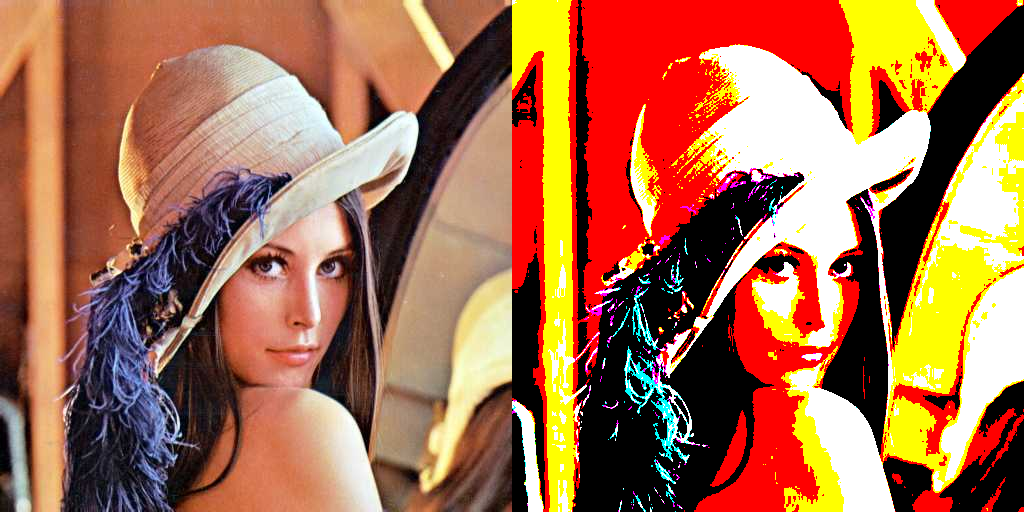

In [34]:
#7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna
img_lena = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def color_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

def color_mapping(img):
    colors = {
        "black": np.array([0, 0, 0]),
        "green": np.array([0, 255, 0]),
        "yellow": np.array([255, 255, 0]),
        "blue": np.array([0, 0, 255]),
        "cyan": np.array([0, 255, 255]),
        "magenta": np.array([255, 0, 255]),
        "white": np.array([255, 255, 255])
    }

    mapped_image = np.zeros_like(img)

    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            pixel_color = img[y, x]
            closest_color = None
            min_distance = float('inf')
            for color_name, color_value in colors.items():
                distance = color_distance(pixel_color, color_value)
                if distance < min_distance:
                    min_distance = distance
                    closest_color = color_value
            mapped_image[y, x] = closest_color

    return mapped_image

mapped_img = color_mapping(img_lena)
final_frame = cv.hconcat((img_lena, mapped_img))
cv2_imshow(final_frame)

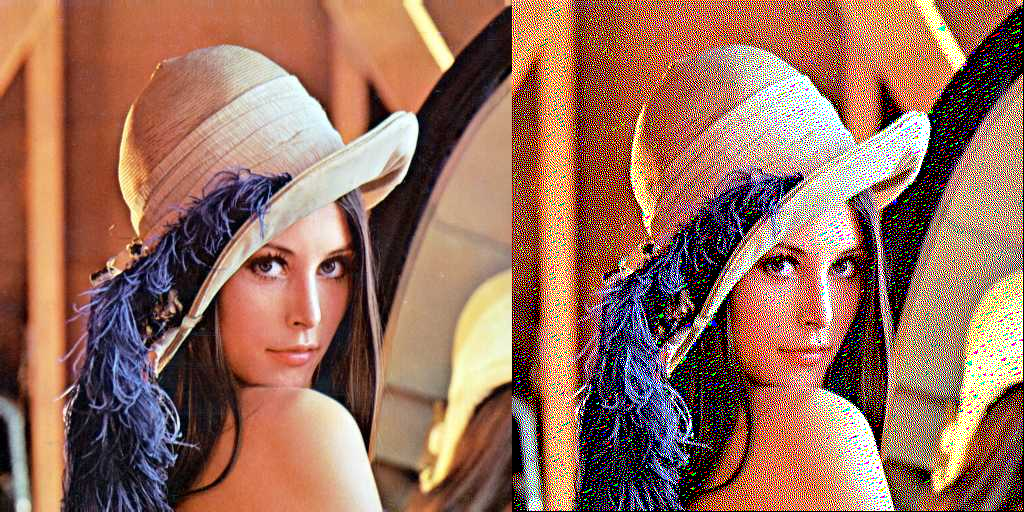

In [37]:
#8. Lakukanlah proses dithering Floyd and Steinberg
img_lena = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def dithering_floyd_steinberg(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    img_dither = np.zeros_like(img)

    for y in range(img.shape[0]-1):
        for x in range(img.shape[1]-1):
            # Red
            old_val_r = img[y,x,0]
            new_val_r = 255 if old_val_r > 127 else 0
            img_dither[y,x,0] = new_val_r
            error_r = old_val_r - new_val_r

            if x < img.shape[1]-1:
                img[y,x+1,0] += error_r * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,0] += error_r * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,0] += error_r * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,0] += error_r * 1 / 16

            # Green
            old_val_g = img[y,x,1]
            new_val_g = 255 if old_val_g > 127 else 0
            img_dither[y,x,1] = new_val_g
            error_g = old_val_g - new_val_g

            if x < img.shape[1]-1:
                img[y,x+1,1] += error_g * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,1] += error_g * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,1] += error_g * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,1] += error_g * 1 / 16

            # Blue
            old_val_b = img[y,x,2]
            new_val_b = 255 if old_val_b > 127 else 0
            img_dither[y,x,2] = new_val_b
            error_b = old_val_b - new_val_b

            if x < img.shape[1]-1:
                img[y,x+1,2] += error_b * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,2] += error_b * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,2] += error_b * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,2] += error_b * 1 / 16

    img_dither = cv.cvtColor(img_dither, cv.COLOR_RGB2BGR)

    return img_dither

img_lena_dithered = dithering_floyd_steinberg(img_lena)
final_frame = cv.hconcat((img_lena, img_lena_dithered))
cv2_imshow(final_frame)

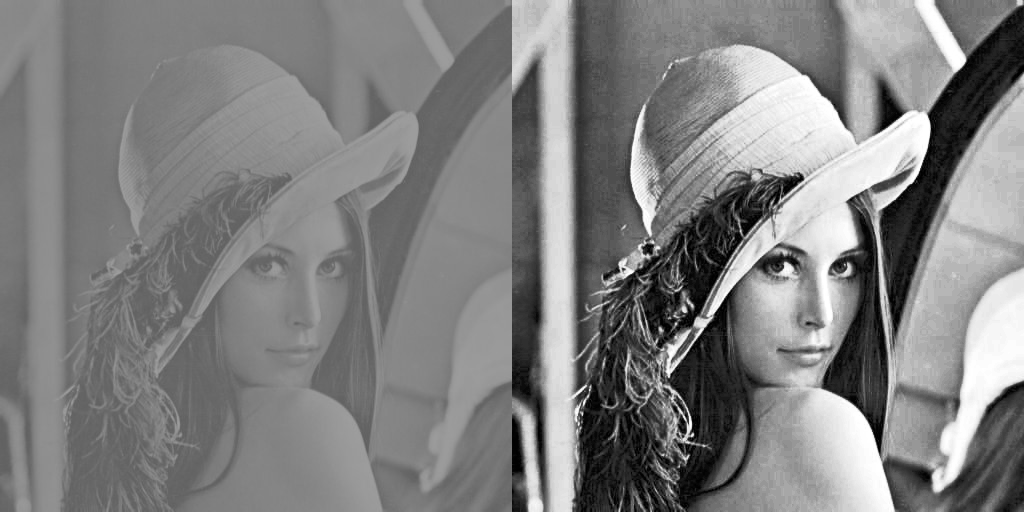

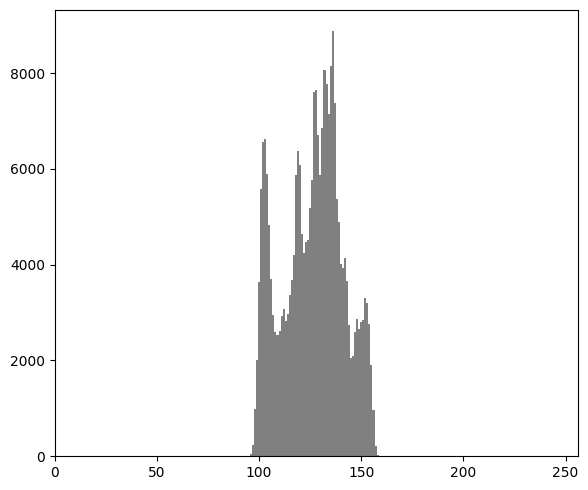

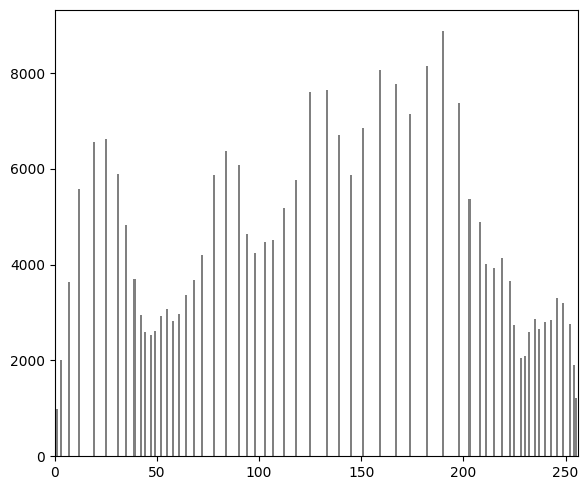

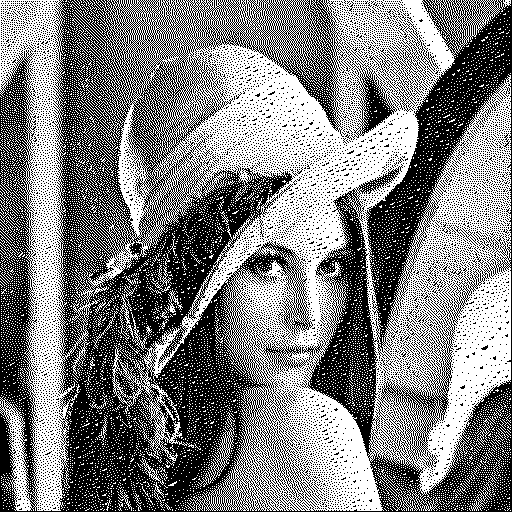

In [44]:
#9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg
img_lena_lc = cv.imread ('/content/drive/MyDrive/PCVK/lena_lc.jpg')

img_lena_lc_gray = cv.cvtColor(img_lena_lc, cv.COLOR_BGR2GRAY)
img_lena_lc_gray = cv.cvtColor(img_lena_lc_gray, cv.COLOR_GRAY2BGR)

img_lena_lc_gray_histeqed = histogram_equalization(img_lena_lc_gray)

final_frame5 = cv.hconcat((img_lena_lc_gray, img_lena_lc_gray_histeqed))
cv2_imshow(final_frame5)


img_lena_lc_gray = cv.cvtColor(img_lena_lc_gray, cv.COLOR_BGR2GRAY)
img_lena_lc_gray_histeqed = cv.equalizeHist(img_lena_lc_gray)

def image_histogram_with_numpy(img):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

    plt.figure(figsize=(6, 5))
    plt.bar(bins[:-1], hist, color='gray', width=1)
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()

image_histogram_with_numpy(img_lena_lc_gray)
image_histogram_with_numpy(img_lena_lc_gray_histeqed)
img_lena_lc_gray_histeqed_dithered = dithering_floyd_steinberg(img_lena_lc_gray_histeqed)
cv2_imshow(img_lena_lc_gray_histeqed_dithered)